In [1]:
# Q7. Decision Tree on Iris Dataset (Single Cell Solution)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Decision Tree Performance on Iris Dataset\n")

for depth in [1, 2, 3]:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    print(f"Max Depth = {depth}")
    print(f"Training Accuracy = {train_acc:.4f}")
    print(f"Test Accuracy     = {test_acc:.4f}")
    print("-" * 40)

print("\nDiscussion:")
print("Depth = 1 → Low training and test accuracy → Underfitting (model too simple, high bias).")
print("Depth = 2 → High training and test accuracy → Good generalization.")
print("Depth = 3 → Very high training accuracy; if test accuracy drops, it indicates Overfitting (high variance).")

Decision Tree Performance on Iris Dataset

Max Depth = 1
Training Accuracy = 0.6667
Test Accuracy     = 0.6667
----------------------------------------
Max Depth = 2
Training Accuracy = 0.9714
Test Accuracy     = 0.8889
----------------------------------------
Max Depth = 3
Training Accuracy = 0.9810
Test Accuracy     = 0.9778
----------------------------------------

Discussion:
Depth = 1 → Low training and test accuracy → Underfitting (model too simple, high bias).
Depth = 2 → High training and test accuracy → Good generalization.
Depth = 3 → Very high training accuracy; if test accuracy drops, it indicates Overfitting (high variance).


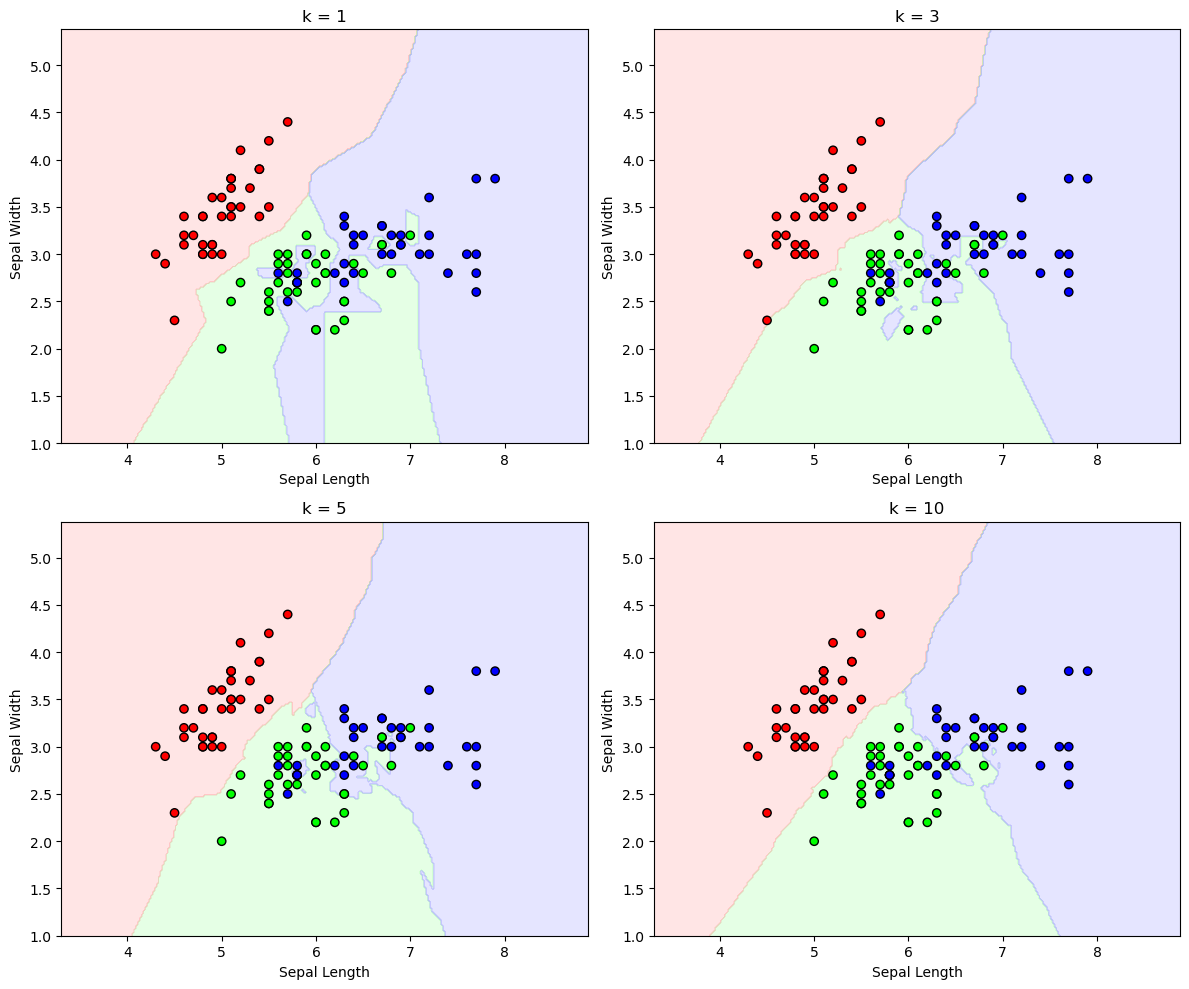

Comments:
k = 1  → Very irregular and complex boundaries (high variance, prone to overfitting).
k = 3  → Smoother boundaries, better generalization.
k = 5  → Even smoother, more stable decision regions.
k = 10 → Very smooth and simple boundaries (higher bias, possible underfitting).


In [2]:
# Q8. kNN Classification on Iris (2 features)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Only sepal length & sepal width
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Create mesh grid for plotting
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

k_values = [1, 3, 5, 10]

plt.figure(figsize=(12, 10))

for i, k in enumerate(k_values):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(2, 2, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF']))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k',
                cmap=ListedColormap(['#FF0000','#00FF00','#0000FF']))
    
    plt.title(f"k = {k}")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")

plt.tight_layout()
plt.show()

print("Comments:")
print("k = 1  → Very irregular and complex boundaries (high variance, prone to overfitting).")
print("k = 3  → Smoother boundaries, better generalization.")
print("k = 5  → Even smoother, more stable decision regions.")
print("k = 10 → Very smooth and simple boundaries (higher bias, possible underfitting).")

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



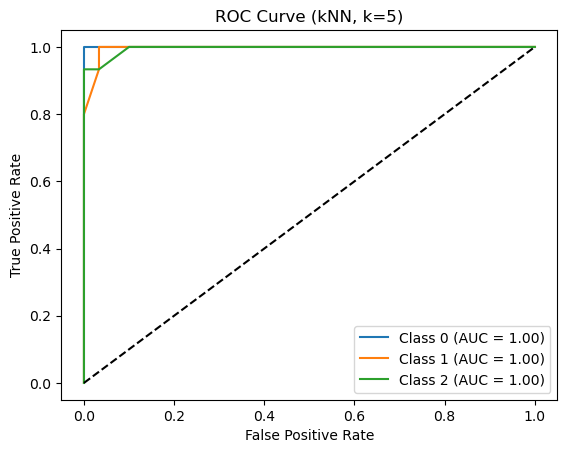

In [3]:
# Performance Evaluation Programming - kNN (k=5) on Iris

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train kNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 2. Classification Report (Accuracy, Precision, Recall, F1)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# 3. ROC Curve & AUC (One-vs-Rest for multiclass)
y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

plt.figure()

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (kNN, k=5)")
plt.legend()
plt.show()